In [70]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Reading data
url = 'https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab4/data.csv'
df = pd.read_csv(url)
df2 = pd.read_csv(url)
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Result
0,33,206,87,81,2,4,31.34
1,49,14,86,50,0,9,44.26
2,79,72,90,62,1,5,73.94
3,28,173,49,67,0,5,14.93
4,62,189,92,47,1,20,59.60


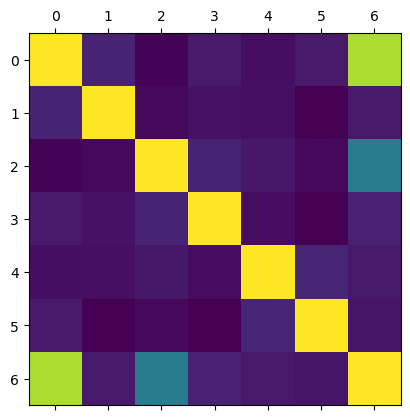

In [71]:
# Create a correlation matrix
corrMatrix = df.corr()
plt.matshow(corrMatrix)
plt.show()


<Axes: xlabel='Var1', ylabel='Result'>

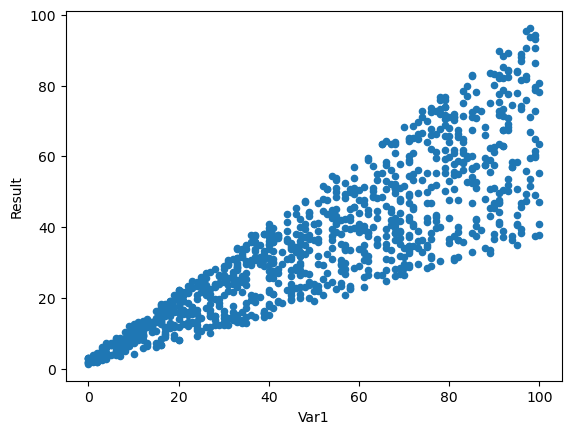

In [72]:
# We an also look at the correlation with scatter plots
df.plot.scatter(x = 'Var1', y = 'Result')

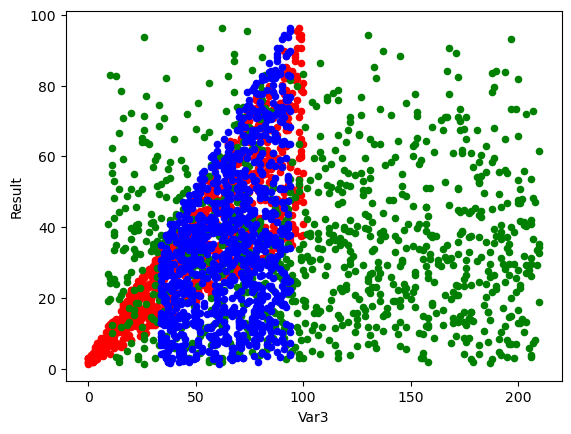

In [73]:
# Can also plot more columns together:
ax1 = df.plot(kind='scatter', x='Var1', y='Result', color='r')
ax2 = df.plot(kind='scatter', x='Var2', y='Result', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='Var3', y='Result', color='b', ax=ax1)

In [74]:
# From the plot, it becomes apparent that different columns
# have different min/max values. To solve this we need to 
# scale the columns to a given interval. We can do this by importing sklearn and using preprocessing.MinMaxScaler()
x = df2.values #returns a numpy array
scaler = preprocessing.MinMaxScaler().fit(x)
x = scaler.transform(x)
df = pd.DataFrame(x)
df.head()
#To keep column names do
#df[list(df.columns)] = scaler.transform(df)
#instead of line 3 and 4
#But we want to just have a numeric id for now, since it will help us later.


,0,1,2,3,4,5,6
0,0.33,0.980100,0.883333,0.909091,0.333333,0.173913,0.316139
1,0.49,0.024876,0.866667,0.439394,0.000000,0.391304,0.452153
2,0.79,0.313433,0.933333,0.621212,0.166667,0.217391,0.764607
3,0.28,0.815920,0.250000,0.696970,0.000000,0.217391,0.143384
4,0.62,0.895522,0.966667,0.393939,0.166667,0.869565,0.613644


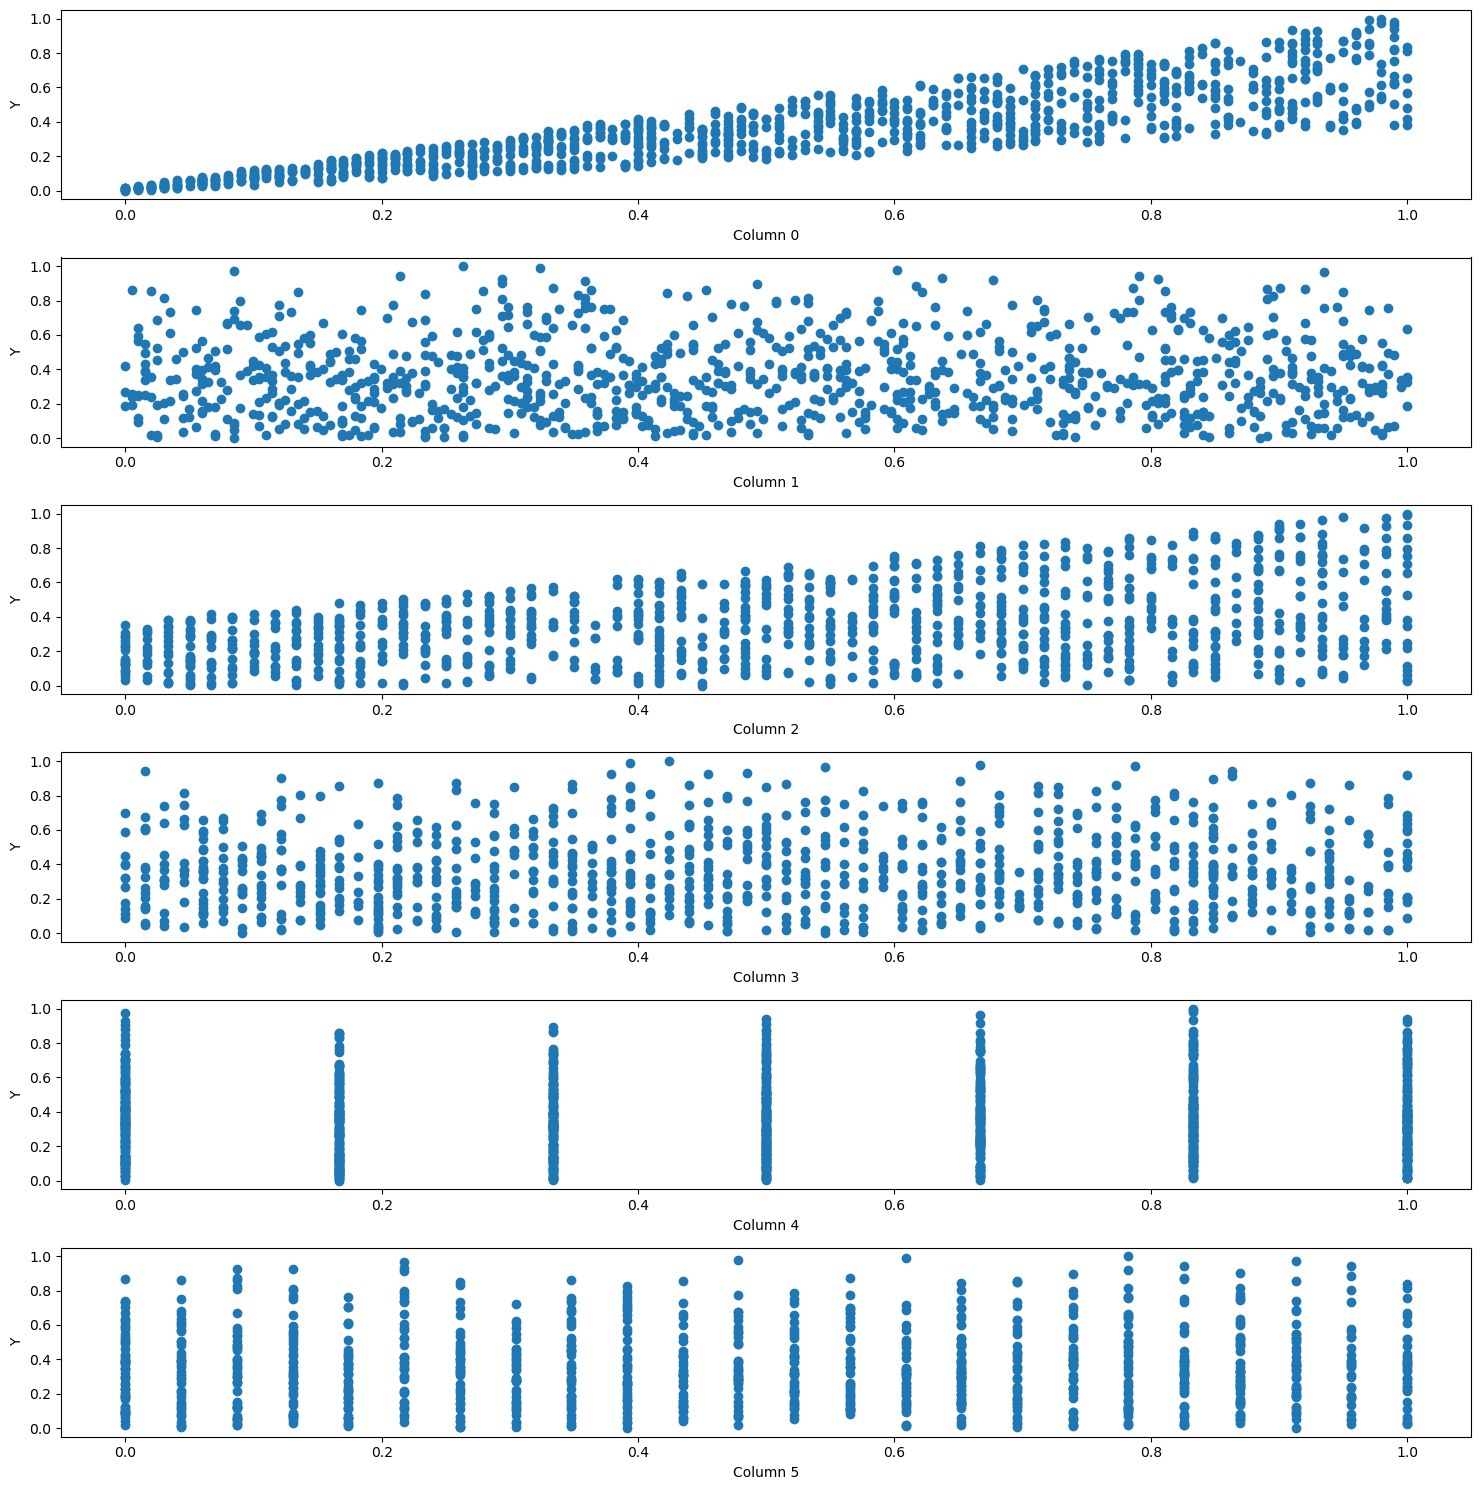

In [75]:
#Scatterplot all columns against last column
fig, ax = plt.subplots(df.shape[1]-1, figsize=(15, 15)) #Figsize ( length, height )
for i in range(df.shape[1]-1):   #This loop is why we wanted to keep column name numeric, and not keep original names
    
    ax[i].scatter(x = df[i], y = df[6])
    ax[i].set_xlabel("Column " + str(i))
    ax[i].set_ylabel("Y")
fig.tight_layout()
plt.show()

In [76]:
# We can reverse the scaling whit tihs code:
x = df.values #returns a numpy array
x = scaler.inverse_transform(x)
df = pd.DataFrame(x)
df.head()

,0,1,2,3,4,5,6
0,33.0,206.0,87.0,81.0,2.0,4.0,31.34
1,49.0,14.0,86.0,50.0,0.0,9.0,44.26
2,79.0,72.0,90.0,62.0,1.0,5.0,73.94
3,28.0,173.0,49.0,67.0,0.0,5.0,14.93
4,62.0,189.0,92.0,47.0,1.0,20.0,59.60


In [77]:
# First let's split the set in a training and testing set
X = pd.DataFrame(df[0]) #Var1
y = pd.DataFrame(df[6]) #Result

#Now, split the set in training and testing set
#test_size = 0.33 tell the function that 1/3 of values should be put in test arrat
#Random state is a variable that seeds the random generator. In that way
#you'll get the same training and testing set each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [78]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_train)  # make predictions

ValueError: x and y must have same first dimension, but have shapes (670, 1) and (330, 1)

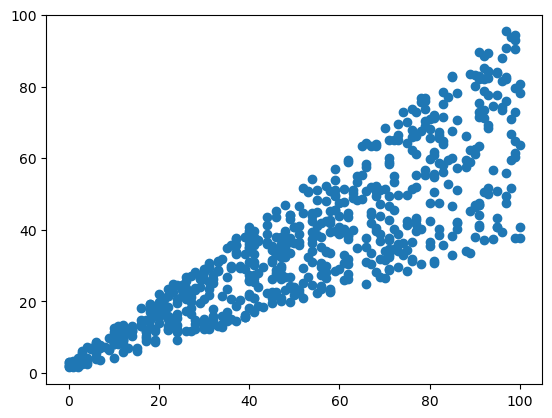

In [80]:
plt.scatter(X_train, y_train)           #Plot blue dots with real data
plt.plot(X_train, Y_pred, color='red')  #Plot red line with prediction
plt.show()
print( "MSE = " + str(metrics.mean_squared_error(y_train, Y_pred))) #Calculate MSE

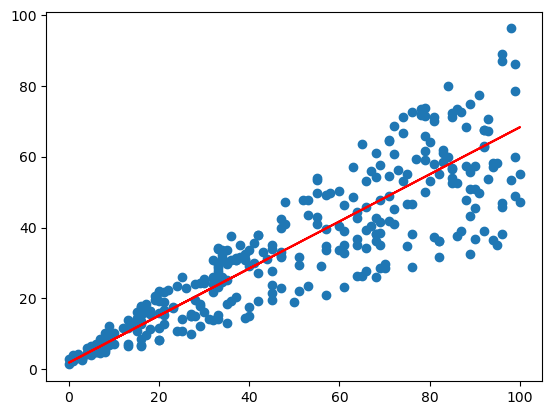

MSE = 99.55992955525117


In [79]:
Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

By chance we got a lower MSE on the test set then on training set.. The lower
MSE is, the more accurate is the model.

## Splitting your sets into training and testing is important so you can verify your model on "unseen" data

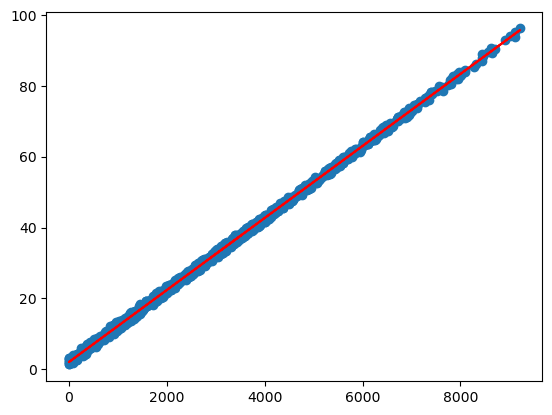

MSE = 0.42183880985144323


In [81]:
df[7] = df[0]*df[2] #new var
X = pd.DataFrame(df[7])
Y = pd.DataFrame(df[6])
#linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(Y,Y_pred)))

## MSE = 0.4 is very low, so unless we have overfitted, we have a linear dataset, and can use Var1 and Var3 to make good predictions

In [82]:
#  Lets manually check with the first row from data_test.csv
linear_regressor.predict([[95*63]]) #Expected output = 62.46

array([[62.93803549]])

In [85]:
df2 = pd.read_csv("https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab4/data_test.csv", sep=",") #Read testset into df2
df2.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Result
0,18,205,85,34,6,17,18.81
1,85,18,91,64,6,4,81.78
2,94,164,43,39,2,9,42.73
3,86,189,37,21,4,22,34.40
4,68,16,94,33,0,3,66.45


In [86]:
#Make a new column for Var1 * Var3
df2["Combined"] = df2["Var1"]*df2["Var3"]
#Set X to the combined set
X = pd.DataFrame(df2["Combined"])
#Y to result
Y = pd.DataFrame(df2["Result"])
#And make sets for Var1 and Var2
X1 = pd.DataFrame(df2["Var1"])
X2 = pd.DataFrame(df2["Var3"])

#And lets do the same for the test set
Xt = pd.DataFrame(df[7])
X1t = pd.DataFrame(df[0])
X2t = pd.DataFrame(df[2])
Yt = pd.DataFrame(df[6])
#Put the data in list, so we can test the different sets in a for loop
dataSet = [X,X1,X2]
trainingSet = [Xt,X1t,X2t]


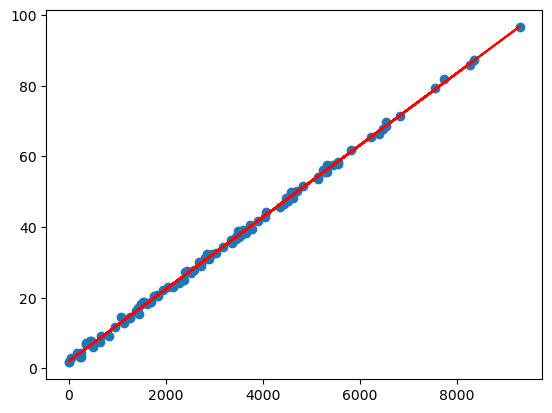

In [87]:
#linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

c:\Users\G\miniconda3\envs\lab-1\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\G\miniconda3\envs\lab-1\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\G\miniconda3\envs\lab-1\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


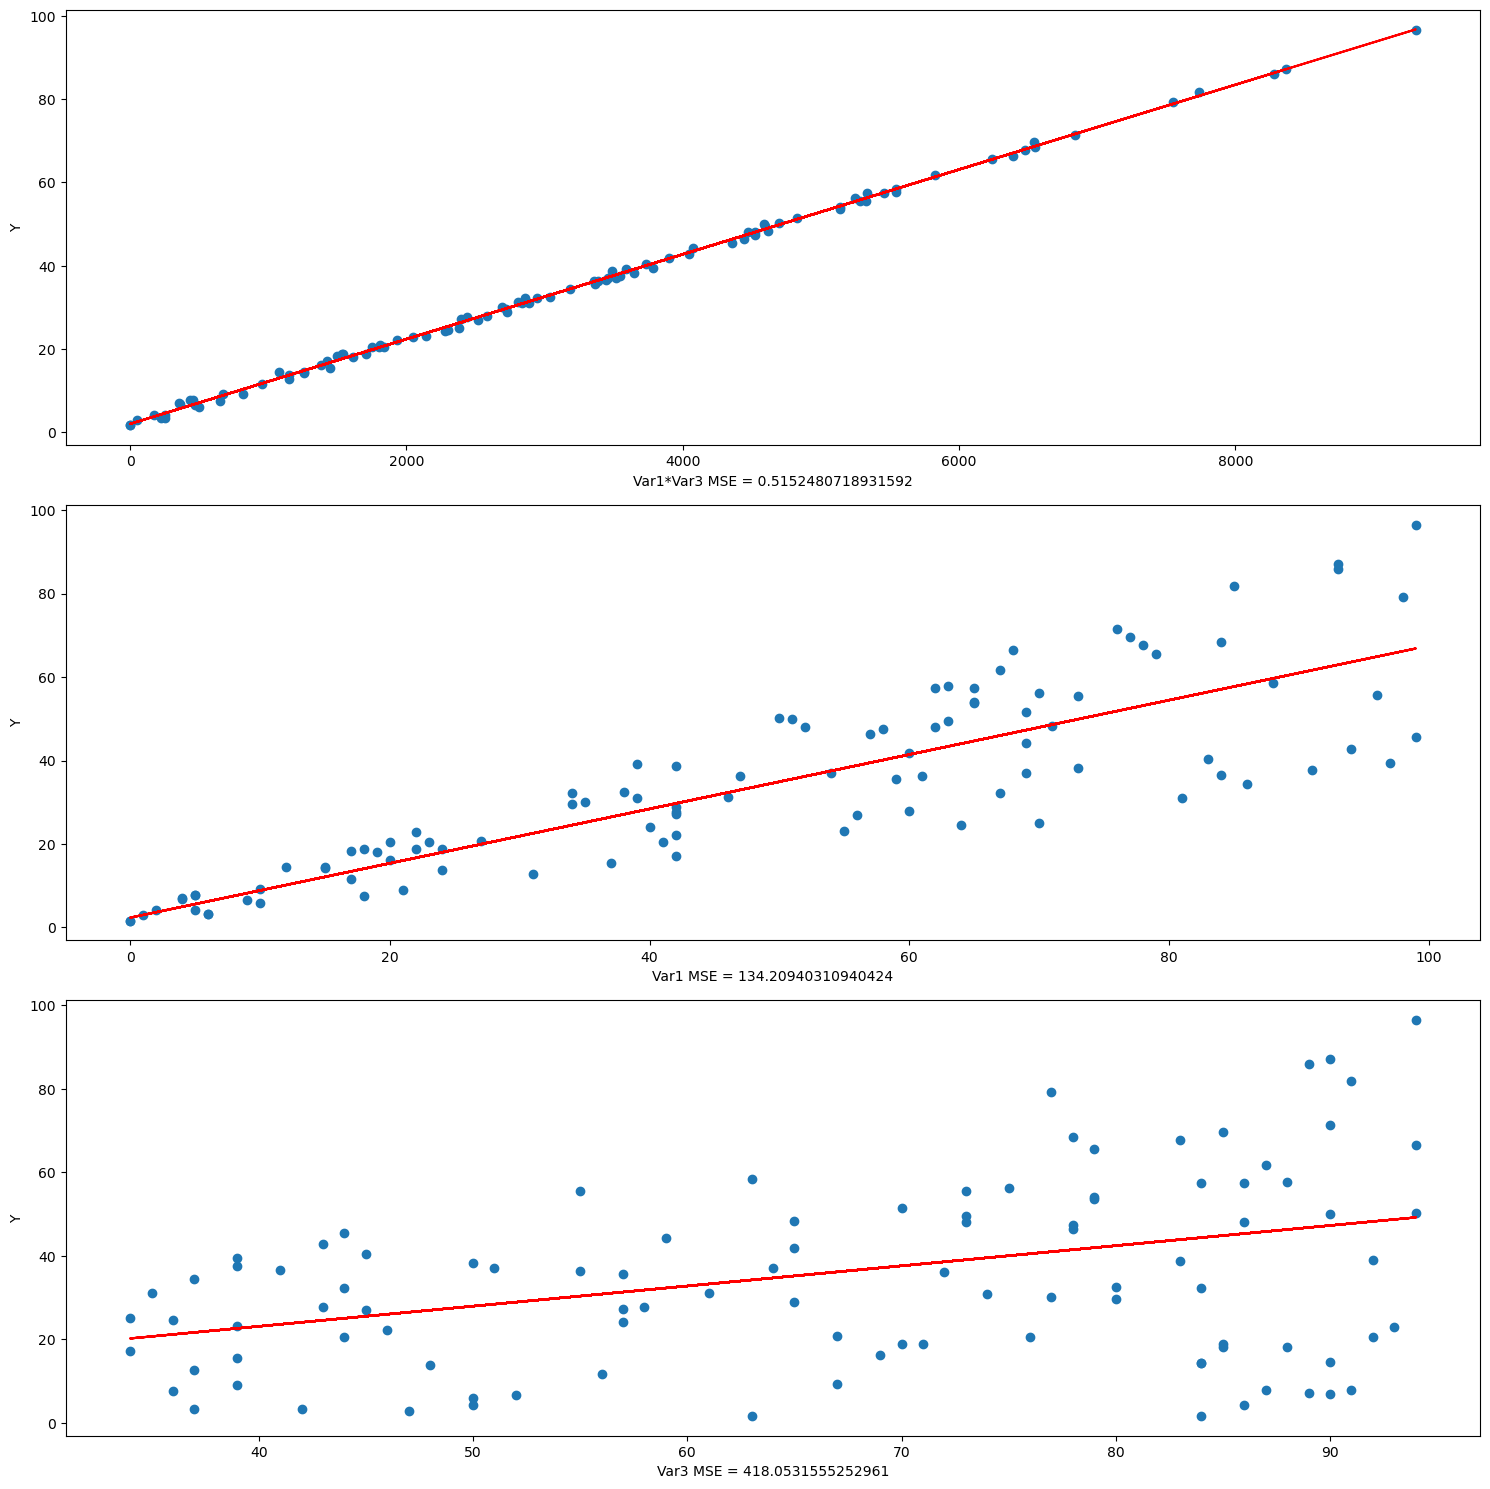

In [88]:
fig, ax = plt.subplots(3, figsize=(15, 15)) #Figsize ( lenght, height )
models = [] #List to save the different model for later use
caps = ["Var1*Var3", "Var1", "Var3"] #Caption for the plots
MSE = [] #list to save mean square error
for i in range(3):  
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(trainingSet[i], Yt)  # perform linear regression
    Y_pred = linear_regressor.predict(dataSet[i])  # make predictions
    ax[i].scatter(dataSet[i], Y) #Plot blue dots from test set
    ax[i].plot(dataSet[i], Y_pred, color='red') #Plot predicted from train
    err=metrics.mean_squared_error(Y,Y_pred)
    ax[i].set_xlabel(caps[i] + " MSE = " +str(err )) #Set caption
    ax[i].set_ylabel("Y") #Set y lable
    MSE.append(err) #Calculate and save mse for model
    models.append(linear_regressor) #Save
fig.tight_layout()
plt.show()

In [89]:
#Var1 * Var3
v1=models[0].predict([[79*36]])
#Var 1
v2=models[1].predict([[79]])
#Var3
v3=models[1].predict([[36]])

In [90]:
print(f"Prediction with:\nVar1*Var3 = {v1[0][0]}\nVar1 = {v2[0][0]}\nVar3 = {v3[0][0]}")
print("Correct value = 31.61")

Prediction with:
Var1*Var3 = 30.950911117701494
Var1 = 53.80770756065712
Var3 = 25.79824010435377
Correct value = 31.61


In [91]:
MSE

[0.5152480718931592, 134.20940310940424, 418.0531555252961]

In [92]:
import pickle

In [93]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(models[0], open(filename, 'wb'))

In [94]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict([[79*36]])

array([[30.95091112]])